In [278]:
from math import exp
import matplotlib.pyplot as plt
from random import random, seed

In [313]:
def sigma(x):
    return 1 / (1 + exp(-x))
def sigmaDeriv(x):
    s = sigma(x)
    return s * (1 - s)
class Perceptron():
    def __init__(self, input_size, H, Hd, learningRate=10):
        self.input_size = input_size
        self.weight = [random()] * input_size
        self.bias = random()
        self.learningRate = learningRate
        self.activation = H
        self.activationDerivative = Hd
    def evaluate(self, x):
        y = sum(self.weight[i] * x[i] for i in range(self.input_size))
        return self.activation(y + self.bias)
    def train(self, x, fx):
        y = sum(self.weight[i] * x[i] for i in range(self.input_size))
        z = sigma(y + self.bias)
        dedw = [2 * (z - fx) * self.activationDerivative(y + self.bias) * x[i] for i in range(self.input_size)]
        dedb = 2 * (z - fx) * self.activationDerivative(y + self.bias)
        for i in range(self.input_size):
            self.weight[i] -= dedw[i] * self.learningRate
        self.bias -= dedb * self.learningRate
class Layer():
    def __init__(self, input_size, size, H, Hd, prevLayer=None, learningRate=1):
        self.input_size = input_size
        self.size = size
        self.layer = [Perceptron(input_size, H, Hd, learningRate) for i in range(size)]
        self.prevLayer = prevLayer
    def evaluate(self, x):
        if not self.prevLayer is None:
            x = self.prevLayer.evaluate(x)
        return [self.layer[i].evaluate(x) for i in range(self.size)]
    def train(self, x, fx):
        origx = x
        if not self.prevLayer is None:
            x = self.prevLayer.evaluate(origx)
        z = [self.layer[i].evaluate(x) for i in range(self.size)]
        prod = [0] * self.size
        for i in range(self.size):
            y = sum(self.layer[i].weight[j] * x[j] for j in range(self.input_size))
            prod[i] = 2 * (z[i] - fx[i]) * self.layer[i].activationDerivative(y + self.layer[i].bias)
            self.layer[i].train(x, fx[i])
        if not self.prevLayer is None:
            dedx = [sum(prod[j] * self.layer[j].weight[i] for j in range(self.size)) for i in range(self.input_size)]
            newx = [0] * self.input_size
            for i in range(self.input_size):
                sys.stdout.flush()
                newx[i] = x[i] - dedx[i] * self.layer[0].learningRate
            self.prevLayer.train(origx, newx)
        #print(f"w: {self.weight}, b: {self.bias}")

In [314]:
dataset = [
    [[0, 0], [0, 1]],
    [[0, 1], [1, 0]],
    [[1, 0], [1, 1]],
    [[1, 1], [0, 1]]
]
seed(1)
nn = Layer(3, 2, sigma, sigmaDeriv, Layer(2, 3, sigma, sigmaDeriv))

x: [0, 0], nn: [0.007657075768925594, 0.9962572603111253], f(x): [0, 1]
x: [0, 1], nn: [0.9821026147463556, 0.017297996032369072], f(x): [1, 0]
x: [1, 0], nn: [0.9821751399234558, 0.9932176995063446], f(x): [1, 1]
x: [1, 1], nn: [0.02306177901657095, 0.9866253211656768], f(x): [0, 1]


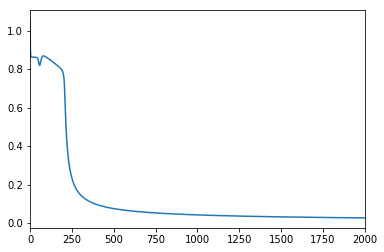

In [315]:
errors = []
EPOCHS = 2000
for i in range(EPOCHS):
    #print(f"Epoch: {i}")
    error = 0
    for x, fx in dataset:
        nn.train(x, fx)
    for x, fx in dataset:
        z = nn.evaluate(x)
        #print(f"x: {x}, nn: {z}, f(x): {fx}")
        error += sum(z[i] - fx[i] for i in range(len(z))) ** 2
    errors.append(error ** 0.5)
for x, fx in dataset:
    z = nn.evaluate(x)
    print(f"x: {x}, nn: {z}, f(x): {fx}")
plt.plot(list(range(EPOCHS)), errors)
plt.xlim(0, EPOCHS)
#plt.ylim(0, max(errors))
plt.show()